Import Libraries

In [119]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the  Dataset

In [120]:
df=pd.read_csv("heart.csv")

In [121]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [123]:
df.shape[0]  # Returns the number of rows

1025

In [124]:
#Checking whether there isany missing value
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data Cleaning and Formatting

In [125]:
# Count Duplicate Rows
print(f"Duplicate Rows: {df.duplicated().sum()}") 

Duplicate Rows: 723


In [126]:
# Removing Duplicates
df=df.drop_duplicates()

In [127]:
#Again checking 
print(f"Duplicate Rows: {df.duplicated().sum()}") 

Duplicate Rows: 0


In [128]:
df.dtypes  # Display data types of all columns

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [129]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [130]:
#renaming
df.rename(columns={
'age':"Age", 'sex':"Sex", 'cp':"Chest_Pain_Type", 'trestbps':"Resting_Blood_Pressure", 'chol':"Serum_Cholestrol",'fbs':"Fasting_Blood_Sugar", 'restecg':"Resting_Electrocardiographic_Results", 'thalach':"Max_Heart_Rate",
       'exang':"Exercise_induced_Angina", 'oldpeak':"St_Depression", 'slope':"ST segment", 'ca':"Num_major_vessels", 'target':"Heart_Disease"},inplace=True)
df.head()

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar,Resting_Electrocardiographic_Results,Max_Heart_Rate,Exercise_induced_Angina,St_Depression,ST segment,Num_major_vessels,thal,Heart_Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [131]:
df.rename(columns={'thal':"Thallium Stress Test"},inplace=True)
df

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar,Resting_Electrocardiographic_Results,Max_Heart_Rate,Exercise_induced_Angina,St_Depression,ST segment,Num_major_vessels,Thallium Stress Test,Heart_Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [132]:
# since the target=1 means disease present so "yes" 
df["Heart Disease Status"]= df["Heart_Disease"].map({0:"No" , 1:"Yes"})
df["Gender"]=df["Sex"].map({0:"Female", 1: "Male"})
df.tail(5)


,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar,Resting_Electrocardiographic_Results,Max_Heart_Rate,Exercise_induced_Angina,St_Depression,ST segment,Num_major_vessels,Thallium Stress Test,Heart_Disease,Heart Disease Status,Gender
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,Yes,Female
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,Yes,Female
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,No,Male
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,No,Male
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0,No,Male


In [133]:
df["Chest_Pain_Label"] = df["Chest_Pain_Type"].map({
    0: "Typical Angina",
    1: "Atypical Angina",
    2: "Non-Anginal Pain",
    3: "Asymptomatic"
})
df.tail(5)  # Check if the new column is added


,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar,Resting_Electrocardiographic_Results,Max_Heart_Rate,Exercise_induced_Angina,St_Depression,ST segment,Num_major_vessels,Thallium Stress Test,Heart_Disease,Heart Disease Status,Gender,Chest_Pain_Label
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,Yes,Female,Non-Anginal Pain
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,Yes,Female,Non-Anginal Pain
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,No,Male,Typical Angina
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,No,Male,Asymptomatic
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0,No,Male,Typical Angina


EDA(Exploratory Data Analysis)

In [134]:
custom_palette = ["#FFEBF3", "#3D5A80"]
sns.set_palette(custom_palette)


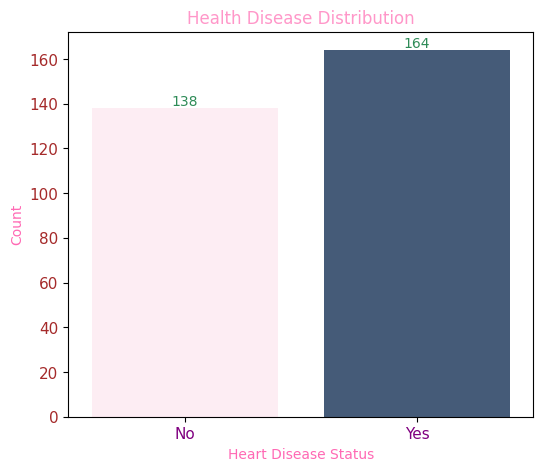

Heart Disease Status
Yes    54.304636
No     45.695364
Name: proportion, dtype: float64

In [135]:
# Let's  Check Target Variable Distribution
plt.figure(figsize=(6,5))

hx=sns.countplot(x="Heart Disease Status",data=df,hue="Heart Disease Status",palette=custom_palette)
for container in hx.containers:
    hx.bar_label(container,fontsize=10,color='seagreen')
plt.title("Health Disease Distribution" , color="#FF97C9")
plt.xlabel("Heart Disease Status" , color="#FF69B4")
plt.ylabel("Count" , color="#FF69B4")
plt.xticks(color="purple", fontsize=11)  # X-axis tick color
plt.yticks(color="brown", fontsize=11)   # Y-axis tick color
plt.show()
# check percentage 
df['Heart Disease Status'].value_counts(normalize=True)*100

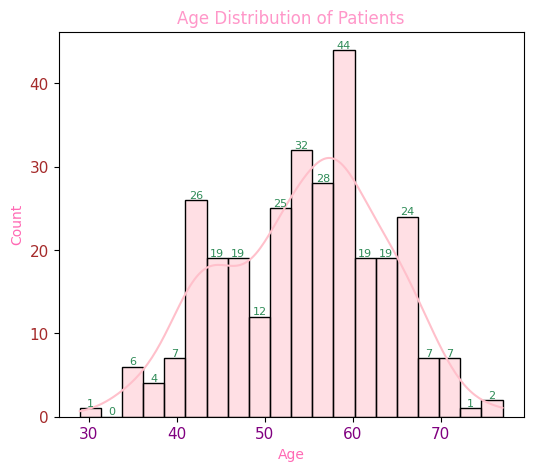

In [136]:
# Age Distribution of Patients
plt.figure(figsize=(6,5))
mx=sns.histplot(df['Age'], bins=20,kde=True,color='pink')
for container in mx.containers:
    mx.bar_label(container,fontsize=8,color='seagreen')
plt.title("Age Distribution of Patients" ,color="#FF97C9")
plt.xlabel("Age", color="#FF69B4")
plt.ylabel("Count" ,color="#FF69B4")
plt.xticks(color="purple", fontsize=11)  # X-axis tick color
plt.yticks(color="brown", fontsize=11)   # Y-axis tick color
plt.show()

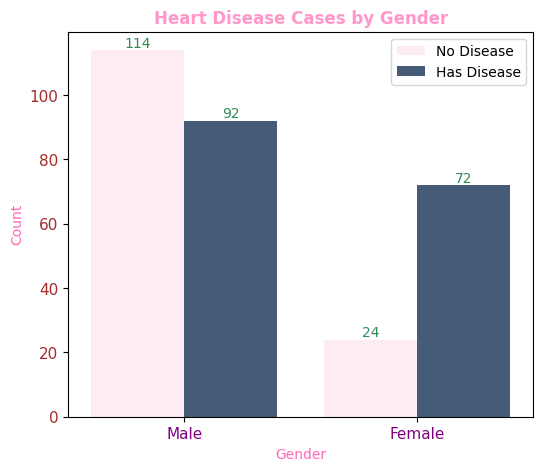

Gender
Male      68.211921
Female    31.788079
Name: proportion, dtype: float64

In [137]:
# Heart Disease VS. Gender
plt.figure(figsize=(6,5))

gx=sns.countplot(x="Gender",hue="Heart Disease Status" , data=df, palette=custom_palette,legend=False)
for container in gx.containers:
    gx.bar_label(container,fontsize=10,color='seagreen')
plt.title("Heart Disease Cases by Gender" , color="#FF97C9",fontweight='semibold' )
plt.xlabel("Gender" ,color="#FF69B4")
plt.ylabel("Count" ,color="#FF69B4")
plt.xticks(color="purple", fontsize=11)  # X-axis tick color
plt.yticks(color="brown", fontsize=11)   # Y-axis tick color
plt.legend(["No Disease" ,"Has Disease"])
plt.show()
df['Gender'].value_counts(normalize=True)*100

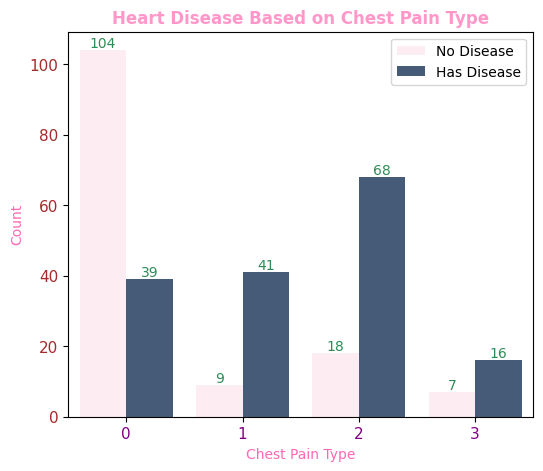

In [138]:
# Chest Pain type & Heart Disease
plt.figure(figsize=(6,5))

cpx=sns.countplot(x='Chest_Pain_Type',hue='Heart_Disease',data=df,palette=custom_palette)
for container in cpx.containers:
    cpx.bar_label(container,fontsize=10,color="seagreen")
plt.title("Heart Disease Based on Chest Pain Type",color="#FF97C9" , fontweight='semibold')
plt.xlabel("Chest Pain Type", color="#FF69B4")
plt.ylabel("Count",color="#FF69B4")
plt.xticks(color="purple", fontsize=11)  # X-axis tick color
plt.yticks(color="brown", fontsize=11)   # Y-axis tick color
plt.legend(["No Disease","Has Disease"])
plt.show()


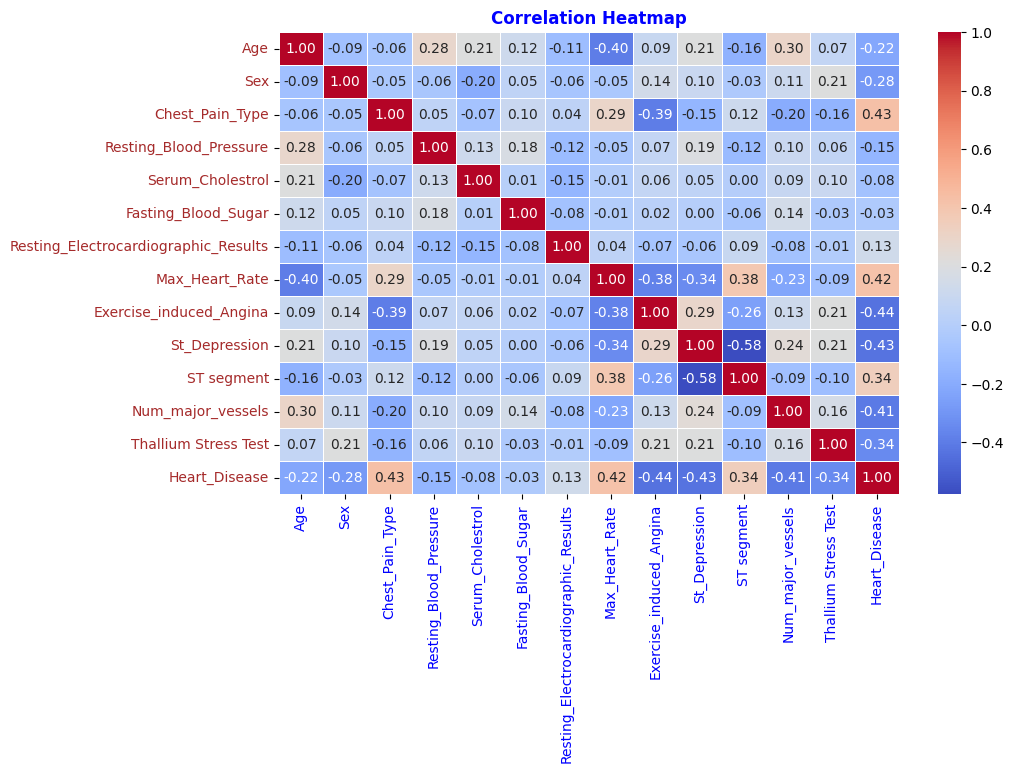

In [139]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=["number"])
sns.heatmap(numeric_df.corr(),annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.xticks(color="blue")
plt.yticks(color="brown")
plt.title("Correlation Heatmap" , color="Blue",fontweight='semibold')
plt.show()

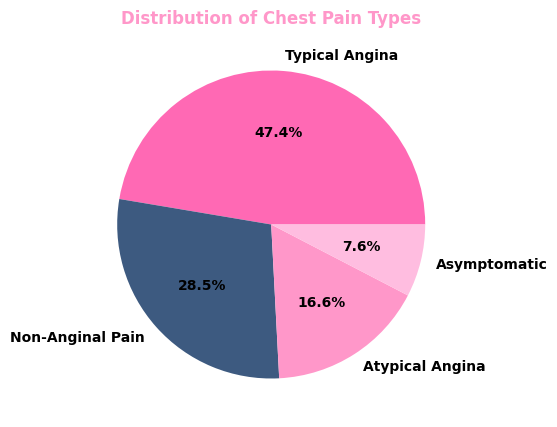

In [140]:
plt.figure(figsize=(6,5))

df["Chest_Pain_Label"].value_counts().plot.pie(autopct="%1.1f%%", colors=["#FF69B4", "#3D5A80", "#FF97C9", "#FFBDE0"], textprops={'color': 'black', 'fontsize': 10, 'fontweight': 'semibold'} )
plt.title("Distribution of Chest Pain Types", color="#FF97C9",fontweight='semibold')
plt.ylabel("" )  # Hide y-label for cleaner look
plt.show()


             Age         Sex  Chest_Pain_Type  Resting_Blood_Pressure  \
count  302.00000  302.000000       302.000000              302.000000   
mean    54.42053    0.682119         0.963576              131.602649   
std      9.04797    0.466426         1.032044               17.563394   
min     29.00000    0.000000         0.000000               94.000000   
25%     48.00000    0.000000         0.000000              120.000000   
50%     55.50000    1.000000         1.000000              130.000000   
75%     61.00000    1.000000         2.000000              140.000000   
max     77.00000    1.000000         3.000000              200.000000   

       Serum_Cholestrol  Fasting_Blood_Sugar  \
count        302.000000           302.000000   
mean         246.500000             0.149007   
std           51.753489             0.356686   
min          126.000000             0.000000   
25%          211.000000             0.000000   
50%          240.500000             0.000000   
75%   

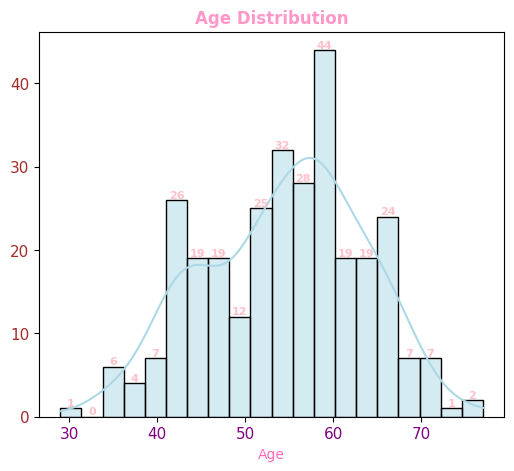

In [141]:
# Statistical Summary and Distribution Analysis
print(df.describe())
# Distribution Analysis
plt.figure(figsize=(6,5))

px=sns.histplot(df['Age'],bins=20,kde=True,color="lightblue")
for container in px.containers:
    px.bar_label(container,fontsize=8,fontweight="bold",color="pink")
plt.title("Age Distribution" , color="#FF97C9",fontweight='semibold')
plt.xlabel("Age" , color="#FF69B4")
plt.ylabel("" ,color="#FF69B4")
plt.xticks(color="purple", fontsize=11)  # X-axis tick color
plt.yticks(color="brown", fontsize=11)   # Y-axis tick color
plt.show()

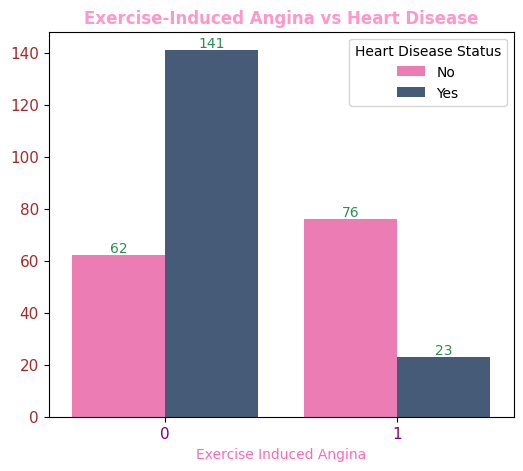

In [142]:
plt.figure(figsize=(6,5))

ax=sns.countplot(x="Exercise_induced_Angina", hue="Heart Disease Status", data=df, palette=["#FF69B4", "#3D5A80"])
for container in ax.containers:
    ax.bar_label(container, fontsize=10,color="seagreen")
plt.title("Exercise-Induced Angina vs Heart Disease", color="#FF97C9",fontweight='semibold')
plt.xlabel("Exercise Induced Angina",color="#FF69B4")
plt.ylabel("",color="#FF69B4")
plt.xticks(color="purple", fontsize=11)
plt.yticks(color="brown", fontsize=11)
plt.show()


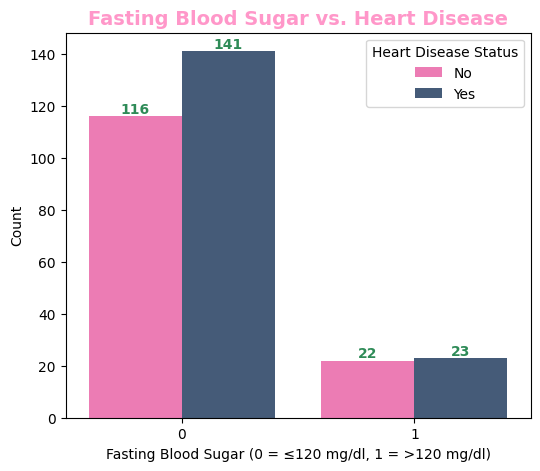

In [143]:

plt.figure(figsize=(6,5))


# Create count plot with hue for heart disease
ax = sns.countplot(x="Fasting_Blood_Sugar", hue="Heart Disease Status", data=df, palette=["#FF69B4", "#3D5A80"])

# Add labels on bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10, fontweight="semibold", color="seagreen")

# Titles & Labels
plt.title("Fasting Blood Sugar vs. Heart Disease", fontsize=14,color="#FF97C9", fontweight="bold")
plt.xlabel("Fasting Blood Sugar (0 = ≤120 mg/dl, 1 = >120 mg/dl)")
plt.ylabel("Count")

plt.show()


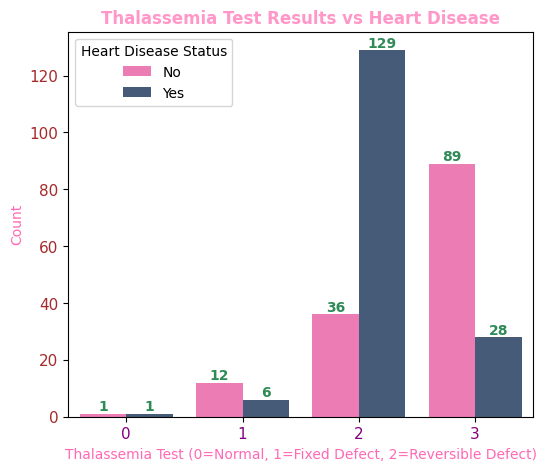

In [144]:
# thalassemia test 
plt.figure(figsize=(6,5))

# Count plot with hue for heart disease breakdown
ax = sns.countplot(x="Thallium Stress Test", hue="Heart Disease Status", data=df, palette=["#FF69B4", "#3D5A80"])

# Add labels on bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10, fontweight="semibold", color="seagreen")

# Labels & Title
plt.title("Thalassemia Test Results vs Heart Disease", fontweight="bold",color="#FF97C9")
plt.xlabel("Thalassemia Test (0=Normal, 1=Fixed Defect, 2=Reversible Defect)", color="#FF69B4")
plt.ylabel("Count", color="#FF69B4")
plt.xticks(color="purple",fontsize=11)
plt.yticks(color="brown",fontsize=11)
plt.show()

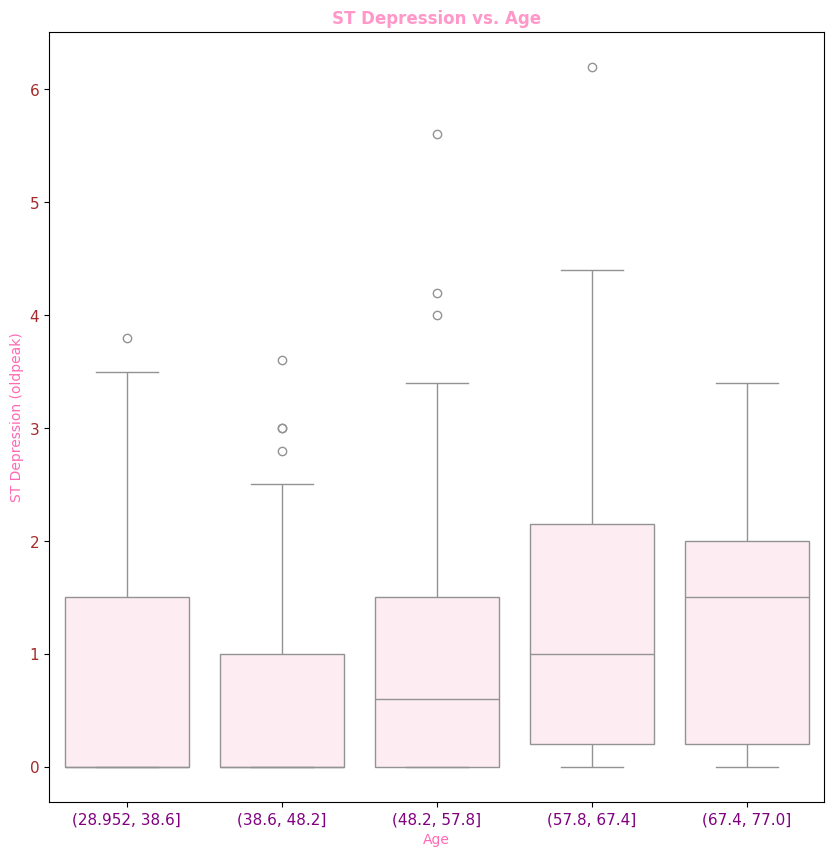


* Older age groups tend to have higher ST Depression (Oldpeak).
* More variation & outliers in older age groups, meaning some older individuals have much higher ST depression levels than younger ones.
* Younger groups have lower ST Depression with fewer extreme values.


In [145]:
# st depression (old peak)
plt.figure(figsize=(10,10))
df=df.sort_values(by='Age')
sns.boxplot(x=pd.cut(df['Age'], bins=5), y=df['St_Depression'])
plt.xlabel("Age",color='#FF69B4')
plt.xticks(color='purple',fontsize=11)
plt.yticks(color='brown',fontsize=11)
plt.ylabel("ST Depression (oldpeak)",color='#FF69B4')
plt.title("ST Depression vs. Age",color='#FF97C9',fontweight="bold")
plt.show()
print("""
* Older age groups tend to have higher ST Depression (Oldpeak).
* More variation & outliers in older age groups, meaning some older individuals have much higher ST depression levels than younger ones.
* Younger groups have lower ST Depression with fewer extreme values.""")

In [147]:
print(df[['Age', 'St_Depression', 'Max_Heart_Rate', 'Serum_Cholestrol', 'Heart_Disease']].head())


     Age  St_Depression  Max_Heart_Rate  Serum_Cholestrol  Heart_Disease
60    29            0.0             202               204              1
143   34            0.0             174               182              1
12    34            0.7             192               210              1
281   35            0.0             174               192              1
254   35            1.6             130               198              0


In [150]:
df.columns = df.columns.str.strip()  # Removes spaces around column names
print(df.columns) 

Index(['Age', 'Sex', 'Chest_Pain_Type', 'Resting_Blood_Pressure',
       'Serum_Cholestrol', 'Fasting_Blood_Sugar',
       'Resting_Electrocardiographic_Results', 'Max_Heart_Rate',
       'Exercise_induced_Angina', 'St_Depression', 'ST segment',
       'Num_major_vessels', 'Thallium Stress Test', 'Heart_Disease',
       'Heart Disease Status', 'Gender', 'Chest_Pain_Label'],
      dtype='object')


In [151]:
df['Heart_Disease'] = df['Heart_Disease'].astype(str)  # Convert to categorical

In [153]:
print(df['Heart_Disease'].isnull().sum())

0


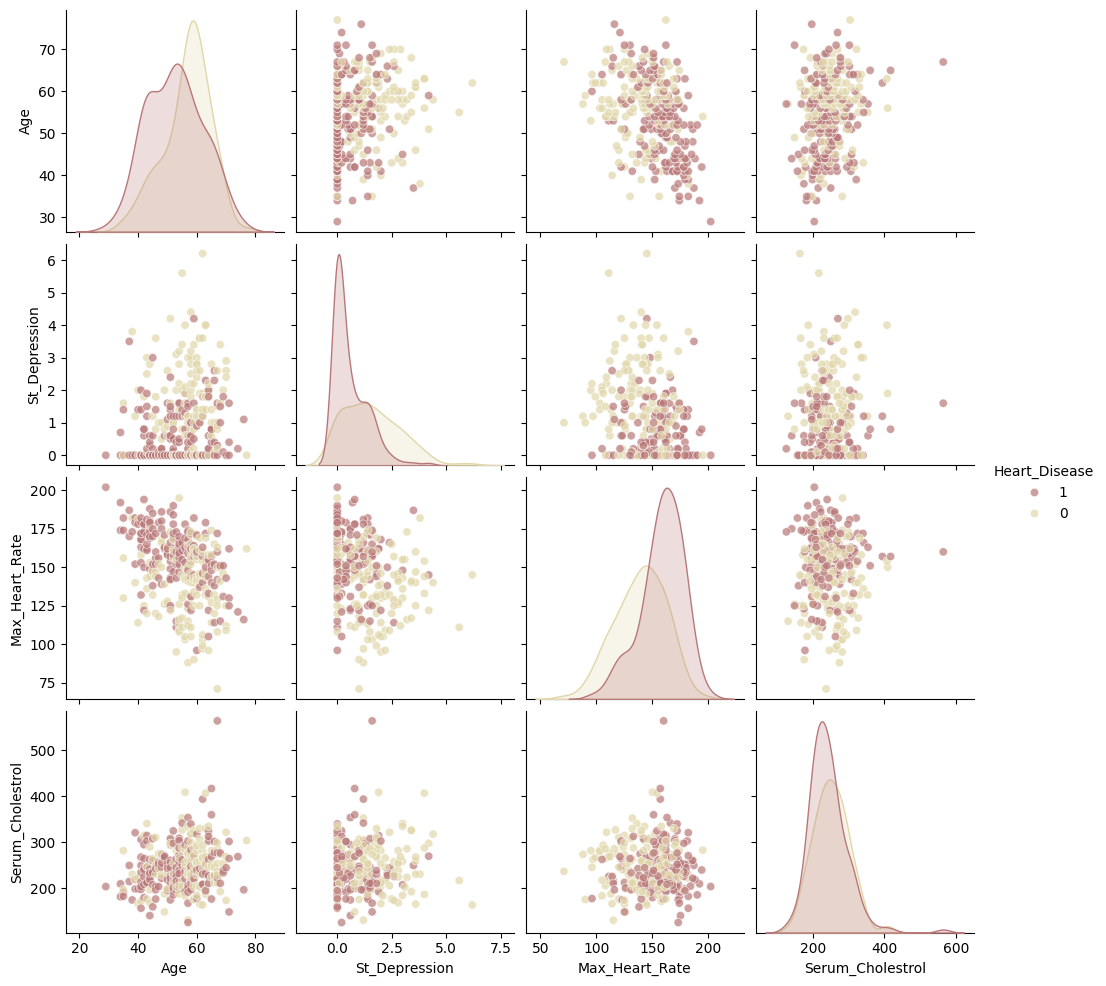

In [158]:
selected_columns = ['Age', 'St_Depression', 'Max_Heart_Rate', 'Serum_Cholestrol', 'Heart_Disease']
df_selected = df[selected_columns]  # Ensure subset works

sns.pairplot(df_selected, hue='Heart_Disease', palette="pink", plot_kws={'alpha': 0.7})

plt.show()
